Induwara Senadheera </br>
190574U

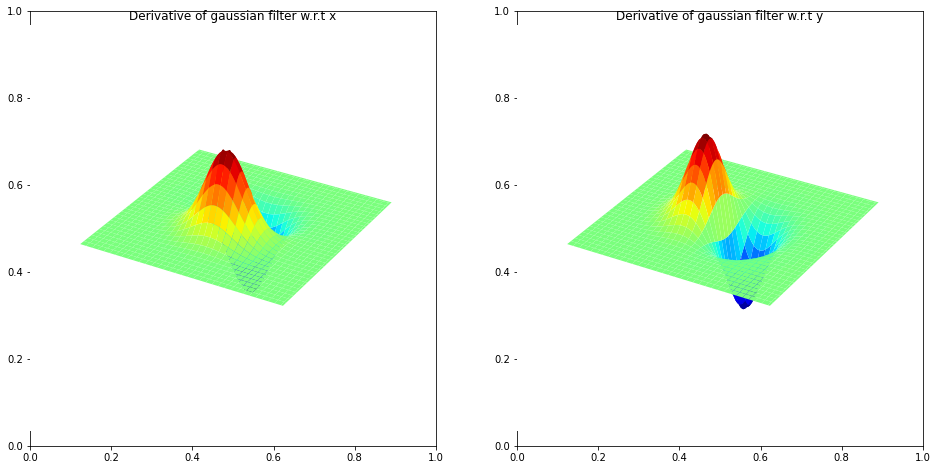

In [14]:
# Question 1 
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


fig,ax = plt.subplots(1,2, figsize=(16,8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
sigma=1

delta =0.1
X,Y = np.meshgrid(np.arange(-5,5+delta,delta),np.arange(-5,5+delta,delta))
z=np.exp(-(X**2+Y**2)/(2*sigma**2))
z/= np.sum(z)

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
Zx = cv.filter2D(z,-1,sobel_v)

sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)
Zy = cv.filter2D(z,-1,sobel_h)


surf1= ax1.plot_surface(X,Y,Zx, cmap=cm.jet, linewidth=0, antialiased=True)
surf2= ax2.plot_surface(X,Y,Zy, cmap=cm.jet, linewidth=0, antialiased=True)

ax1.set_title('Derivative of gaussian filter w.r.t x')
ax2.set_title('Derivative of gaussian filter w.r.t y')

ax1.axis('off')
ax2.axis('off')
plt.show()

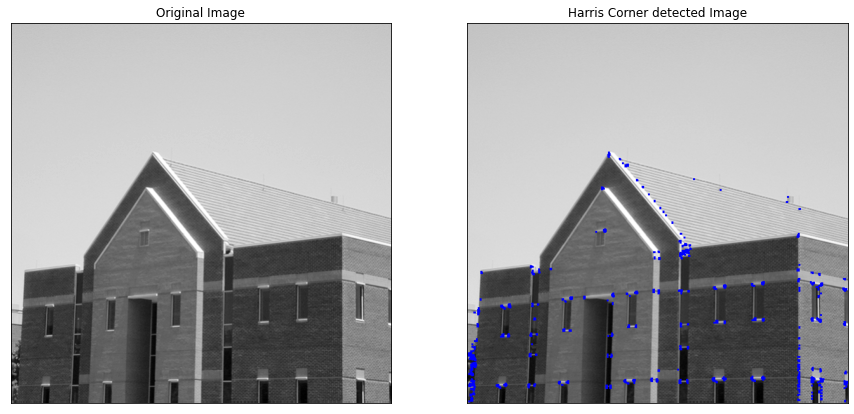

In [6]:
# Question 2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread(r"./Images/building.tif", cv.IMREAD_COLOR)
assert im is not None

gray=cv.cvtColor(im,cv.COLOR_BGR2GRAY)
gray=np.float32(gray)
dst=cv.cornerHarris(gray,2,3,0.04)

dst=cv.dilate(dst,None)

im[dst>0.01*dst.max()]=[0,0,255]

fig,ax=plt.subplots(1,2,figsize=(15,11))

ax[0].imshow(gray,cmap="gray")
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[0].set_title("Original Image")

ax[1].imshow(im,cmap="gray")
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[1].set_title("Harris Corner detected Image")

plt.show()

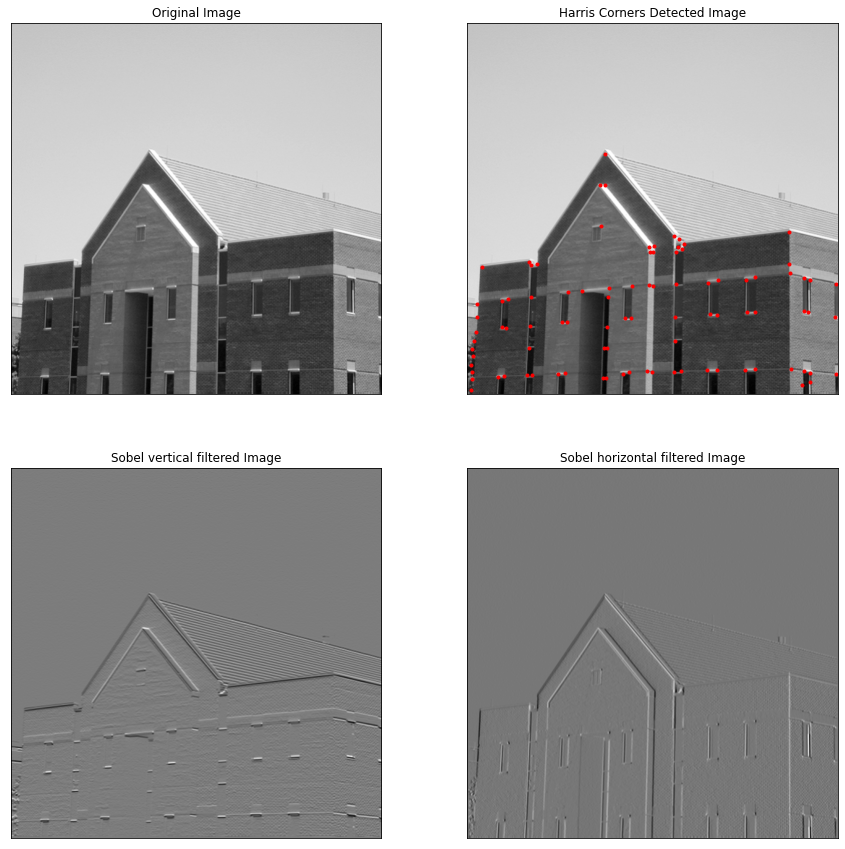

In [11]:
# Question 3
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

im = cv.imread(r"./Images/building.tif",cv.IMREAD_COLOR)
assert im is not None

I  = cv. cvtColor(im, cv.COLOR_BGR2GRAY)
I = np.float32(I)

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)

Ix = cv.filter2D(I,-1, sobel_v)
Iy = cv.filter2D(I,-1,sobel_h)

sigma=3
ksize=7
m11 = cv.GaussianBlur(Ix*Ix,(ksize,ksize),sigma)
m12=cv.GaussianBlur(Ix*Iy,(ksize,ksize),sigma)
m21 = m12
m22 = cv.GaussianBlur(Iy*Iy,(ksize,ksize),sigma)

det = m11*m22 - m12*m21
trace = m11+m22
alpha = 0.04
R = det - alpha*trace**2
R[R<1e8] = 0
cordinates = peak_local_max(R, min_distance = 2)

fig, ax =plt.subplots(2,2, figsize=(15,15))

for i in range(4):
    ax[i//2,i%2].set_xticks([]), ax[i//2,i%2].set_yticks([])

ax[0,0].imshow(im, cmap= 'gray')
ax[0,0].set_title('Original Image')
ax[0,1].imshow(im, cmap = 'gray')
ax[0,1].set_title('Harris Corners Detected Image')
ax[0,1].plot(cordinates[:,1],cordinates[:,0], 'r.')
ax[1,0].imshow(Ix+127, cmap = 'gray')
ax[1,0].set_title('Sobel vertical filtered Image')
ax[1,1].imshow(Iy+127, cmap = 'gray')
ax[1,1].set_title('Sobel horizontal filtered Image')

plt.show()

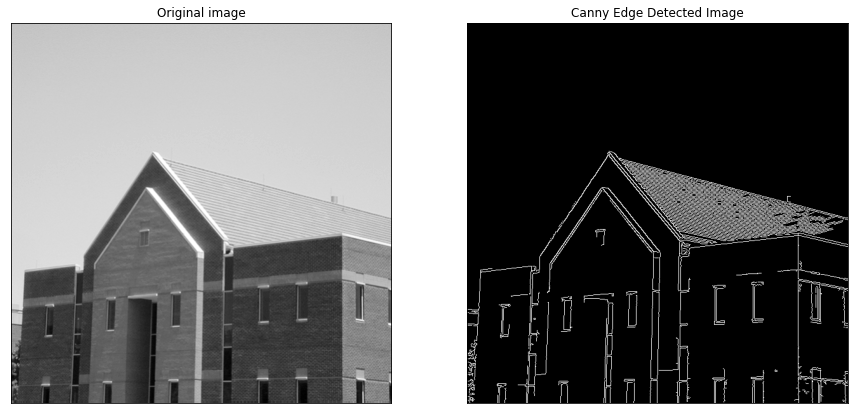

In [12]:
# Question 4
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"./Images/building.tif", cv.IMREAD_GRAYSCALE)
assert img is not None

edges=cv.Canny(img,100,200)

fig,ax=plt.subplots(1,2,figsize=(15,11))
ax[0].imshow(img,cmap="gray")
ax[0].set_title('Original image')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].set_title('Canny Edge Detected Image')
ax[1].imshow(edges,cmap="gray")
ax[1].set_xticks([]), ax[1].set_yticks([])

plt.show()